# 6.1 Multiple Linear Regression

Multiple linear regression involves performing linear regression with more than one independent variable. As you may know, multiple regression with n predictors can be expressed as:

$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_k x_{in} + \epsilon_i$$

In this equation:

- $\beta_0$​ is the intercept, representing the expected value of $y$ when all $x$-values (predictors) are 0.
- $\beta_1$​ represents the change in $y$ for a one-unit increase in $x_{i1}$​, while all other predictors are held constant.
- The same interpretation applies to the other predictors, $\beta_2, \beta_3, ..., \beta_n$
- $\epsilon_i$ represents the residual variance that is not explained by the model.


```{admonition} Independent and dependent variables
:class: note
- **Dependent variable**: The variable we are trying to explain with our model (outcome)
- **Independent variables**: The variable we use to explain the dependent variable (predictors)
```

In Python, various methods and libraries are available for performing multiple regression. Some methods involve manual implementation, while others utilize libraries such as `sklearn` or `statsmodels`. For this example (and for many more models in the upcoming weeks), we will focus on using `statsmodels`.

As an example, let us consider the `trees` data set from the `datasets` package, which includes measurements of the girth, height, and volume of 31 felled black cherry trees.

## Step 1: Importing the Libraries

In [1]:
import pandas as pd                   # Pandas to handle the data
from statsmodels.api import datasets  # Module for the data set
import statsmodels.formula.api as smf # Module for the regression

import seaborn as sns                 # Seaborn for simle plotting
import matplotlib.pyplot as plt       # Matplotlib to show the figure

## Step 2: Loading and Preprocessing the Data

We will now import the "trees" dataset and convert the measurements from inches, feet, and cubic feet to meters and cubic meters (because no one likes imperial units). After that, we’ll view the first few rows of the dataset using the `head()` method.

In [2]:
# Load the "trees" dataset from R datasets
trees_data = datasets.get_rdataset('trees').data

# Convert units
trees_data['Girth']  = trees_data['Girth']  * 0.0254 # inches to meters
trees_data['Height'] = trees_data['Height'] * 0.3048 # feet to meters
trees_data['Volume'] = trees_data['Volume'] * 0.0283 # cubic feet to cubic meters

# Round to 3 decimal places
trees_data = trees_data.round(3)

# Display the first few rows of the dataset
print(trees_data.head())

   Girth  Height  Volume
0  0.211  21.336   0.291
1  0.218  19.812   0.291
2  0.224  19.202   0.289
3  0.267  21.946   0.464
4  0.272  24.689   0.532


## Step 3: Visualizing the Data

Before we proceed with modeling, **it is strongly recommended to visualize the data**. Here it can, for example, guide us in determining whether linear regression is appropriate. We’ll use the `pairplot()` function from the `seaborn` package to create scatterplots for every pair of variables, and a histogram for each variable. 

*Additional information: In a Jupyter Notebook, we do not need the explicit `plt.show()`. However, it would always be needed in a normal Python script, so I put it here to avoid any potential confusion.*

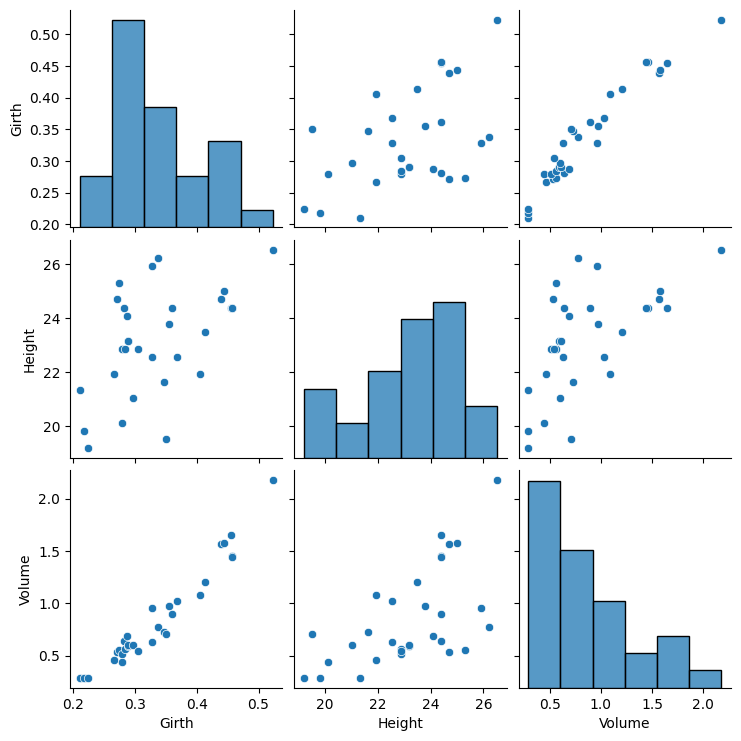

In [3]:
sns.pairplot(trees_data);
plt.show()

Based on the visual inspection, we see that there seems to be a strong linear relationship between the volume and girth of the trees, and a weaker relationship between the volume and the height. 

## Step 4: Fitting the Model

Next, we will create a multiple linear regression model with `Volume` as the dependent variable, and `Girth` and `Height` as the independent variables.

For this, we will use the `ols()` class from the `statsmodels.formula.api` module to build the model. The regression equation is specified in *formula notation*: `response ~ predictor(s)`. In case of multiple predictors, they are separated by a `+` sign. Once a model is specified correctly, the `fit()` method can be used to fit the model, and the `summary()` method will then provide a detailed overview of the model results.


```{admonition} Ordinary least squares (OLS) regression
:class: note
OLS is a method used to minimize the sum of squared differences between the observed values of the dependent variable and the predicted values from the model.
```

In [4]:
model = smf.ols(formula='Volume ~ Girth + Height', data=trees_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     253.3
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           1.17e-18
Time:                        08:52:52   Log-Likelihood:                 25.963
No. Observations:                  31   AIC:                            -45.93
Df Residuals:                      28   BIC:                            -41.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6422      0.245     -6.698      0.0

Specifying a model with formula notation is useful, as it is identical to the syntax of the R programming language. If you are comfortable with either one, you can quickly switch between both programming languages.

```{code-block}
# R code
model <- lm(Volume ~ Girth + Height, data = trees_data)
summary(model)
```

An alternative (and slightly more flexible) way of creating a regression model using `statsmodels` is to use the standard `OLS` class:

```{code-block}
import statsmodels.api as sm

# Define dependent (y) and independent (X) variables
X = trees_data[['Girth', 'Height']]  # Select predictors
X = sm.add_constant(X)               # Add constant for the intercept
y = trees_data['Volume']             # Response variable

model = sm.OLS(y, X)
results = model.fit()
```

This can be useful if you need special control over your design matrix (e.g., custom transformations or programmatic workflows), but requires the extra step of creating it yourself (which also includes to manually add the intercept term). Thus, we will mostly use the intially shown syntax, which under the hood uses the [patsy package](https://patsy.readthedocs.io/en/latest/) to convert formulas and data to the matrices that are used in model fitting.


## Step 5: Interpreting the Model Outputs

The regression summary provides important information about the model:

- **Intercept** ($\beta_0$​): This is the predicted value of `Volume` when `Girth` and `Height` are both zero.
- **Girth** ($\beta_1$​): This represents the change in `Volume` for a one-unit increase in `Girth`, assuming Height remains constant.
- **Height** ($\beta_2$): This represents the change in `Volume` for a one-unit increase in `Height`, assuming Girth remains constant.

Each coefficient includes:

- **Standard error**: Measures the accuracy of the coefficient estimate.
- **t-value**: Tests the hypothesis that the coefficient is different from zero.
- **p-value**: A small p-value suggests that the predictor variable is statistically significant.

R-squared and Adjusted R-squared

- **R-squared**: Indicates the proportion of variance in the dependent variable explained by the model. It increases with more predictors, even if they don't improve the model.
- **Adjusted R-squared**: Adjusts for the number of predictors, penalizing for adding unnecessary predictors, and is more reliable for evaluating model performance.

F-statistic

- The **F-statistic** compares the fit of the model to a model with no predictors. A large F-statistic and a low p-value indicate that the independent variables have real predictive power.

## Step 6: Making Predictions

Now that we have a fitted model, we can predict a volume given some (unseen) girth and height. To do this, we use the `predict()` method:

In [5]:
X_predict = pd.DataFrame({'Girth': [0.3, 0.4, 0.5],
                   'Height': [20, 21, 22]})
prediction = results.get_prediction(X_predict)

for i in range(len(X_predict)):
    print(f"Predicted volume for a girth of {X_predict['Girth'].iloc[i]} and a height of {X_predict['Height'].iloc[i]} is: {prediction.predicted_mean[i]} m³")

Predicted volume for a girth of 0.3 and a height of 20 is: 0.5624568769460039 m³
Predicted volume for a girth of 0.4 and a height of 21 is: 1.1189061488332346 m³
Predicted volume for a girth of 0.5 and a height of 22 is: 1.6753554207204655 m³


```{admonition} Summary
:class: tip
- `sns.pairplot()` from `seaborn` is useful for scatterplot matrices.
- The `ols()` method from `statsmodels` can be used to fit multiple linear regression models.
```